# Wine Rating Prediction

## Background

It is often hard for people with little knowledge of wine to pick a good bottle of wine, and the rating given by the wine store cannot be trusted sometimes. I am interested in creating an algorithm that predict wine ratings with some basic information to help people make the wine choice.  

## Introduction to the dataset

The original dataset was downloaded from Kaggle https://www.kaggle.com/zynicide/wine-reviews, there are 2 datasets available in the link, the dataset I used is winemag-data_first150k.csv. 
<br>
It consists of 150,930 observations and 10 columns (excluding the 1st index column): country, description, designation, points, price, province, region_1, region_2, variety, winery. 
<br>
Country, province, regions(region_1 and region_2) and wineries are all indicators related to where the wine is coming from, so they can be considered as redundant variables. For the simplicity purpose, I picked "country' as the explanatory variable and removed province, regions and wineries columns. I also decided to drop description and designation and only keep price and variety from the datasets. <br>

In conclusion, the columns we used in this project include:<br>
 <br>
**Points**: Numeric. The number of points WineEnthusiast rated the wine on a scale of 1-100

**Country**: Categorical. The country that the wine is from

**Price**: Numeric. the cost for a bottle of the wine.

**Variety**: Categorical. The type of grapes used to make the wine (ie Pinot Noir)

## Model Limitation

Wine rating is a subjective rating, different people might have different rating for the same bottle of wine. I want to use different machine learning methods to fit a model with historical wine review data scraped from Wine Enthusiast website to see if the wine rating can be predicted with over 60% testing accuracy rate. <br>

However, as mentioned before, wine tasting is very subjective. People tend to have very different opinions on the same wine. Even my prediction result is generally satisfied, people might not agree on the predicted rating. 

## Exploratory Data Analysis & Preprocessing

For numerical variables, I did box plots and hisotgram to observe the distribution of the data. For categorical variables, I did bar plots. <br>
From the EDA, it could be observed that for columns "country", "variety" and "price", the data is very imbalanced. Thus, I decided to remove some records in order to obatin a more balanced distribution. <br>

The codes for EDA and Preprocessing is in a seperate jupyter notbook with detail explanation of each step. I will summarize the steps taken to preprocess the data. <br>

1. Remove rows with country value not in this list:['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Austria'].
2. Remove rows with wine varities in this list:['Chardonnay','Pinot Noir','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend','Sauvignon Blanc','Syrah','Riesling','Merlot','Zinfandel','Sangiovese','Malbec','White Blend','Rosé','Tempranillo','Nebbiolo','Portuguese Red','Sparkling Blend','Shiraz','Corvina, Rondinella, Molinara']
3. Remove records with wine price over $100.

After the preprocessing steps, there are 93472 rows left. 


## Feature Engineering

Feature engineering codes are also in a seperate jupyter notebook with detail explanation for each step. I will summarize the steps taken in this report. The input data is the data after preprocessing steps discussed above. <br>
1. Remove unnecessary columns.
2. Move the target prediction column, which is "points" to the first column.
3. For numeric variables, replace the missing value with median value.
4. For categorical variables, use one hot encoding to convert text to number.
5. Split the dataset into train and test.

## Model Training in AWS

### 1. Upload files to S3 bucket

Create a new bucket in S3 called "aicamp-winerating-project", upload the train.csv, test.csv and data_processed.csv into the bucket.
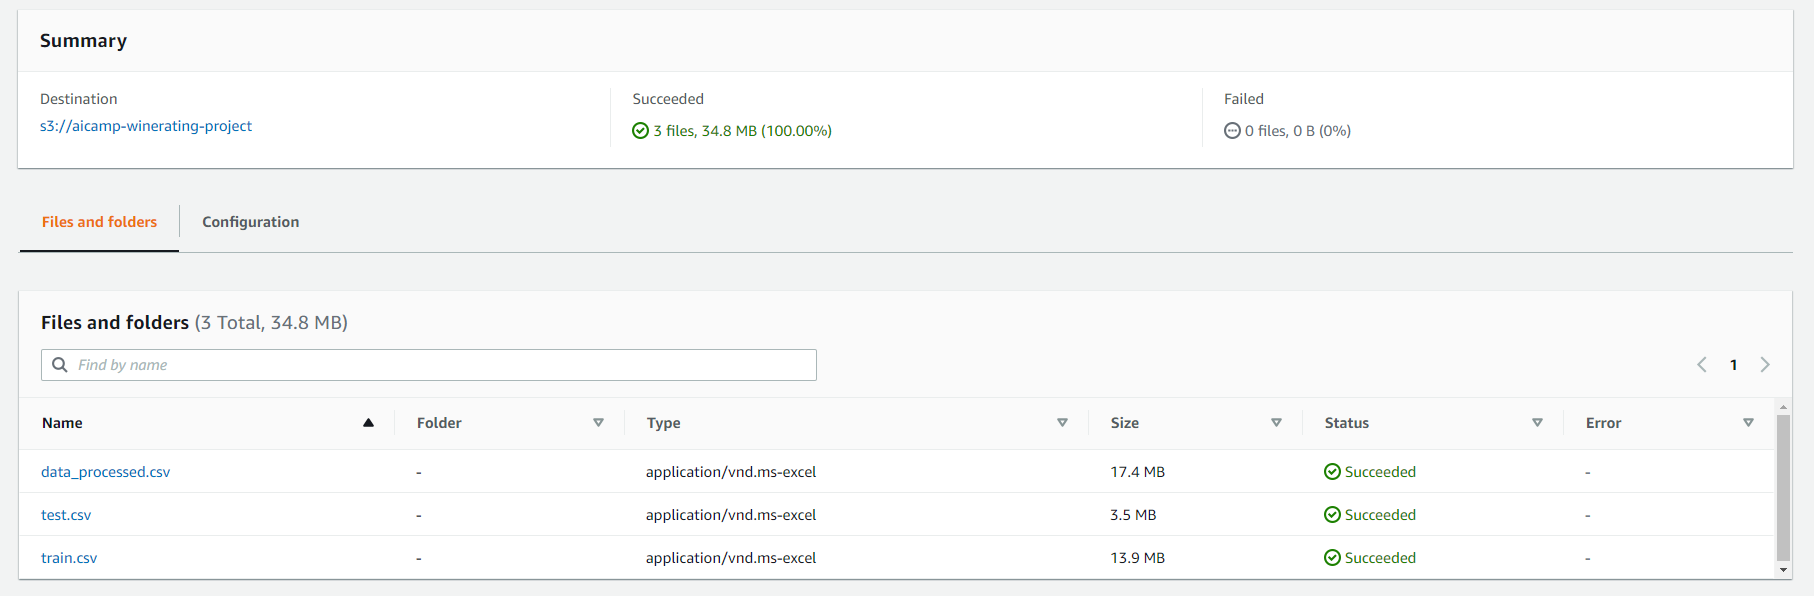

### 2. Set up a training job in AWS Sagemaker

### XGBoost baseline model

I use **XGBoost** with default settings for the baseline model training. Below are the settings. <br>
**num_round** = 10, <br>
**objective** = reg:linear, <br>
**eval_metric** = rmse<br>
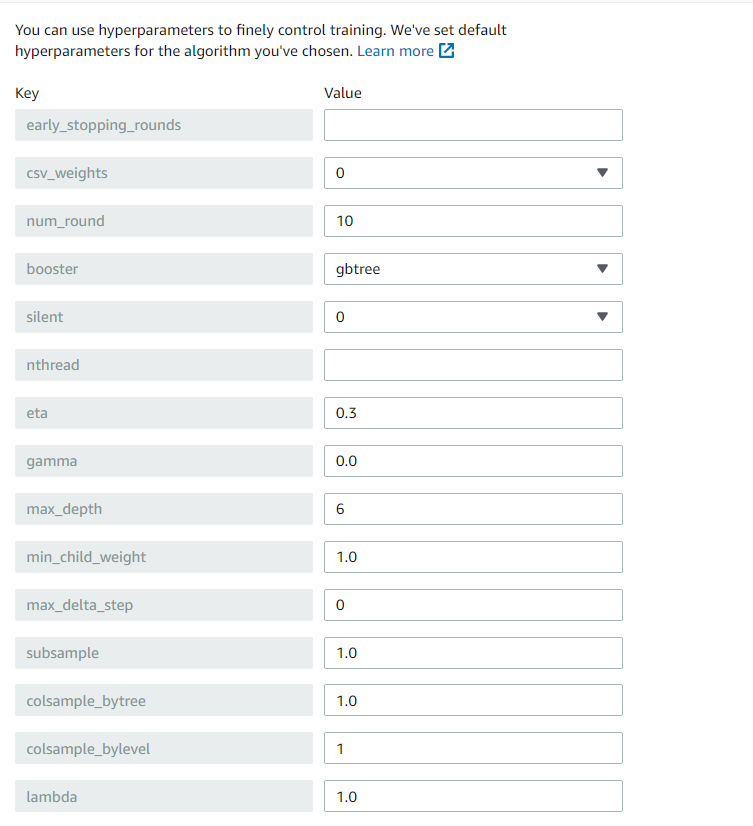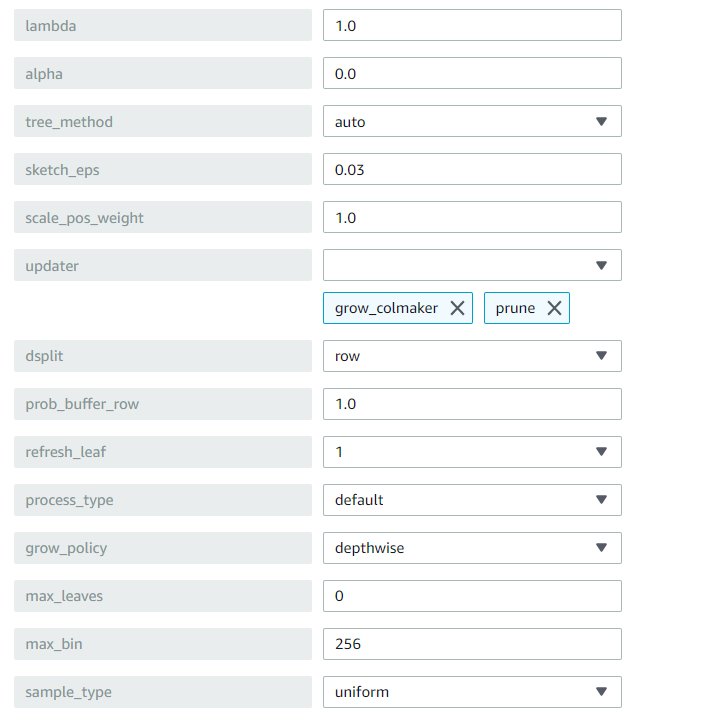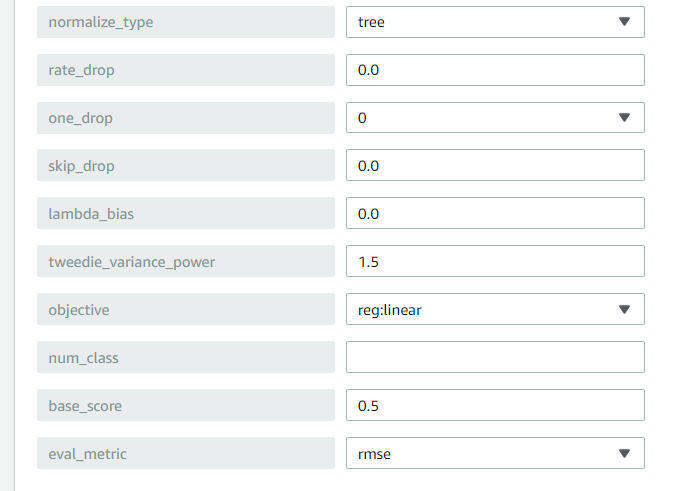

**After the training is done, the train rmse is 3.53787 and validation rmse is 3.54061. <br>
Below are the training log:**
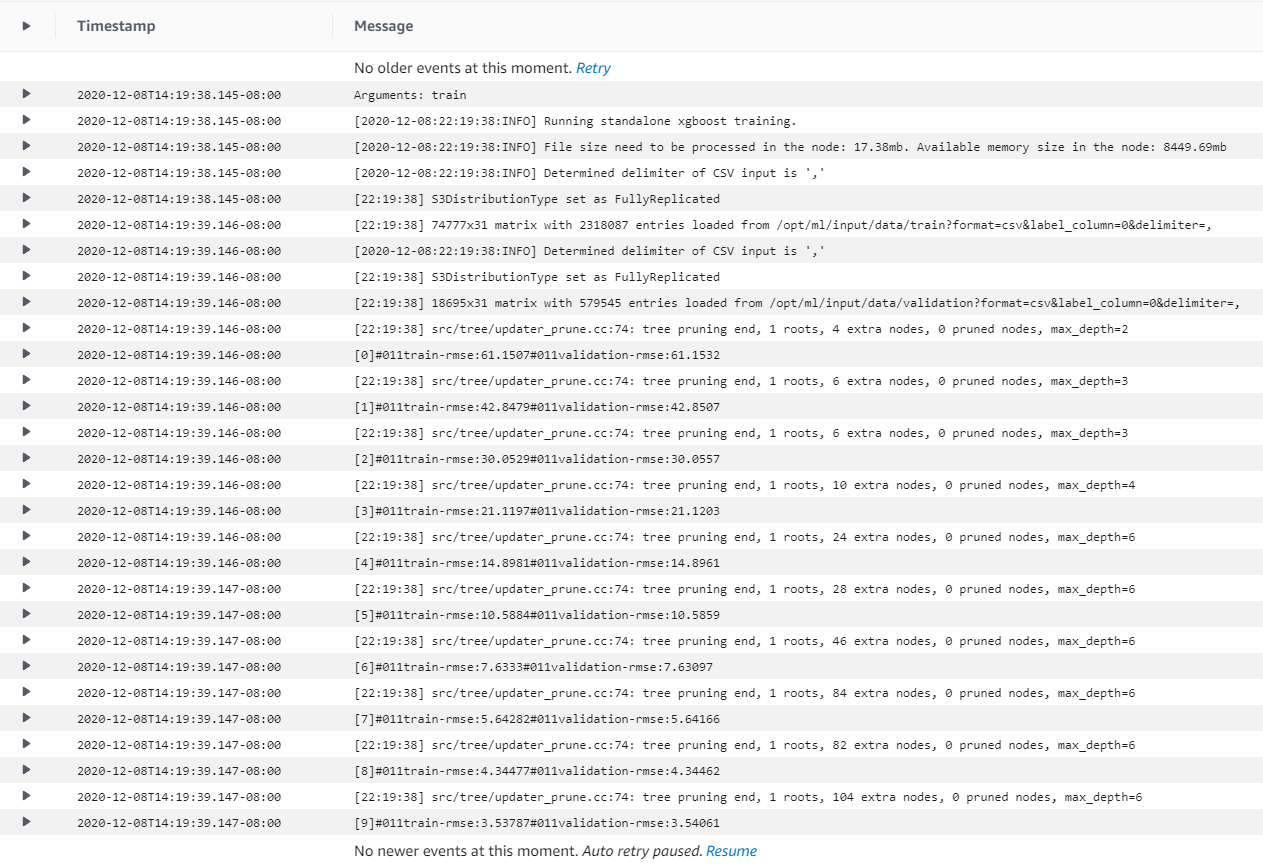

### Hyperprameters Finetuning

I created a Hyperparameter tunning job in Sagemaker to fine tune the model, searching for the best hyperparameters.<br>

**early_stopping_rounds** = 10<br>
**num_round** = range from 10 to 50<br>
**max_depth** is s the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit. I set the range to (9,12)<br>
**min_child_weight** is the minimum weight required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit. The range is set to be (5,8)<br>
**eta** is the learning rate. Ususally, the lower the learning rate, the better, however, the training time will increases dramatically with a low learning rate. The range is set to be (0.1,0.3)

**5 models could be trained in parallel, and maximum of 500 models in total.**

140 training jobs are done, the best one has RMSE at 2.4954. <br>
The best model's hyperparameters are shown below: 
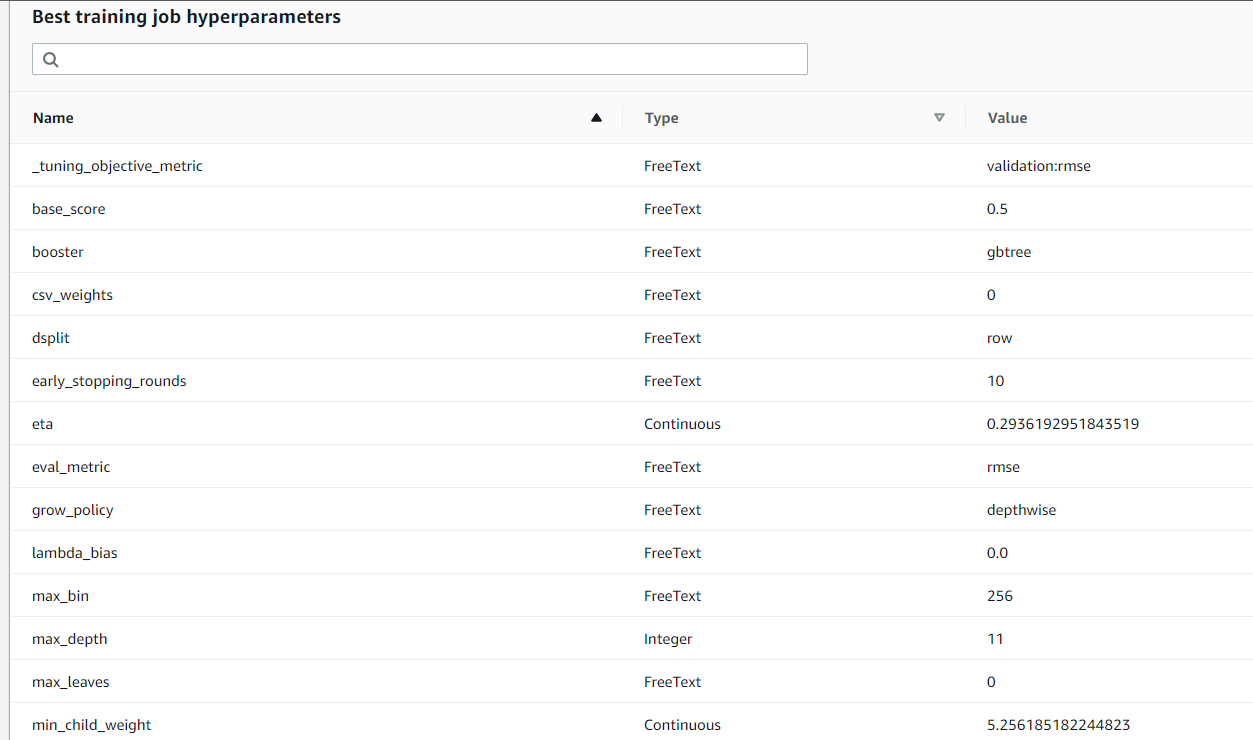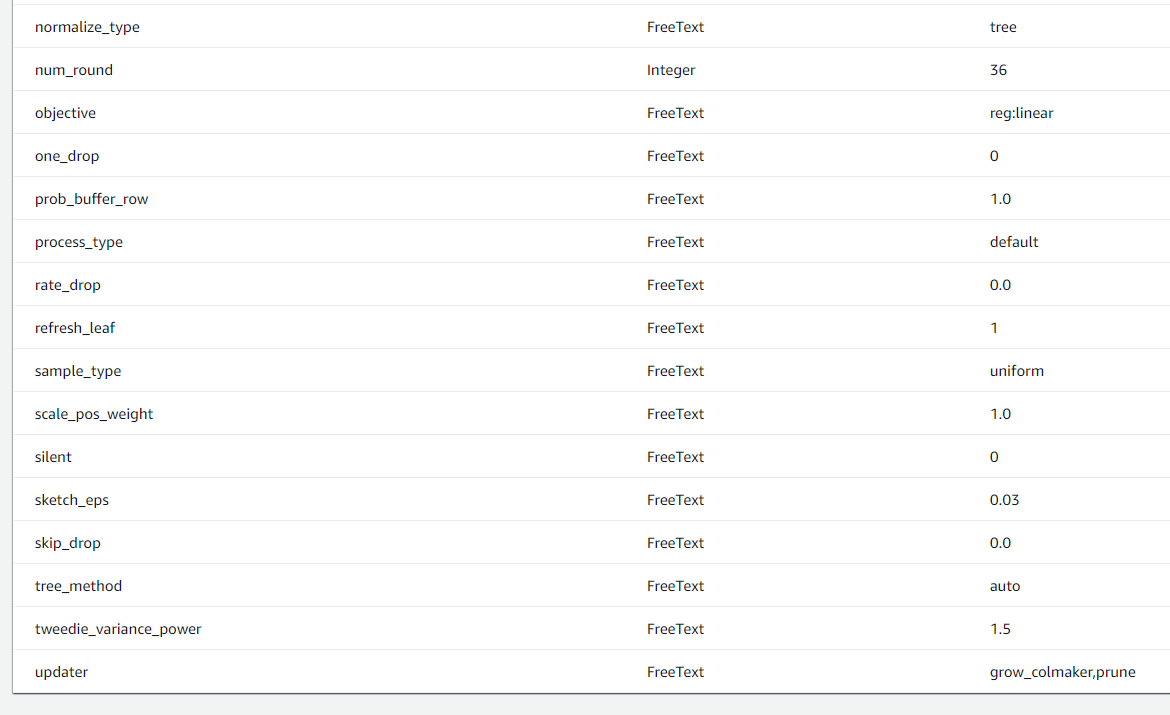

### RMSE Graph
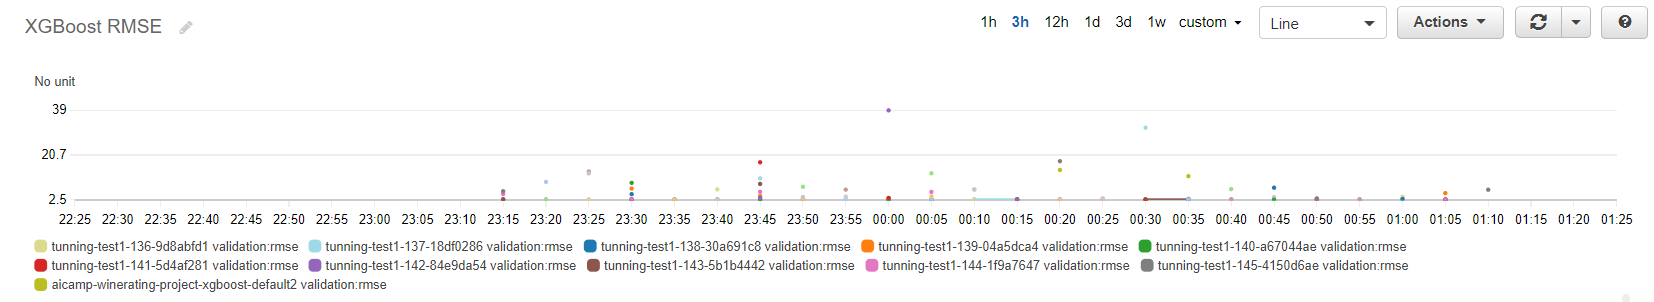

### Create Model

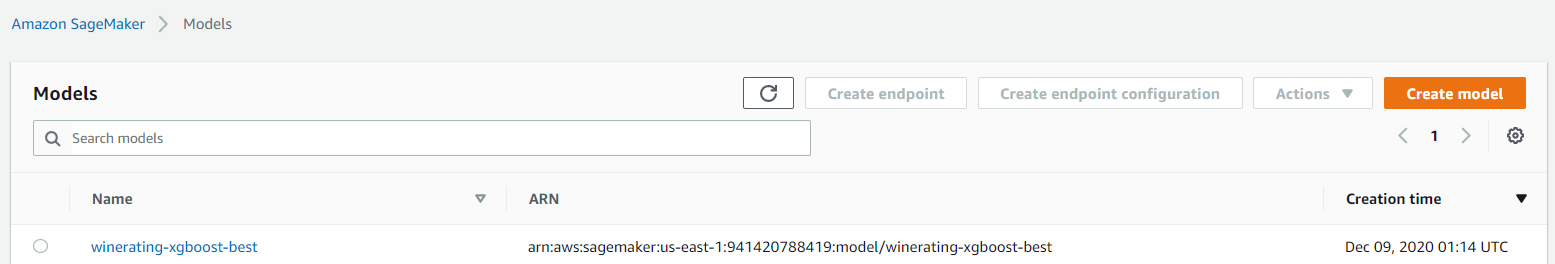

### Save the model

Go to S3 bucket, download the best model to be shared on gitlab.
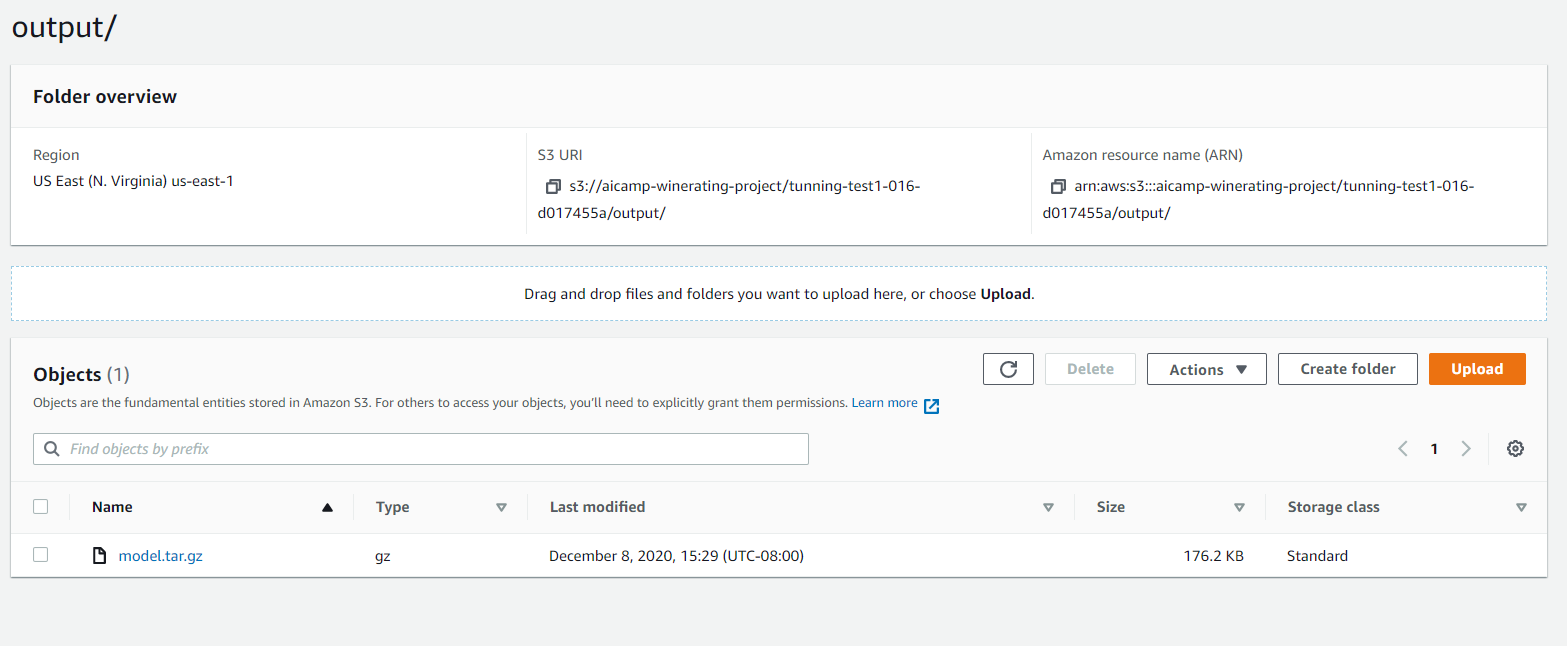